# Grand Circus Capstrone Project 002
### Andrew & Joe's Data Analysis
IMDB MOVIES/SHOWS REPORT

Files available:
- name.basics.tsv
- title.akas.tsv
- title.basics.tsv
- title.crew.tsv
- title.episode.tsv
- title.principals.tsv
- title.ratings.tsv

### Inports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Setting up File Location Variables

In [2]:
#   Set the location of the files.
file_location = r"C:\Users\j\Downloads\Day039Data"

# Now add the names of the files to the location...
file1 = file_location + "\\name.basics.tsv"
file2 = file_location + "\\title.akas.tsv"
file3 = file_location + "\\title.basics.tsv"
file4 = file_location + "\\title.crew.tsv"
file5 = file_location + "\\title.episode.tsv"
file6 = file_location + "\\title.principals.tsv"
file7 = file_location + "\\title.ratings.tsv"

# #   Joe's paths...
# file1 = r'C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\name.basics.tsv/data.tsv'
# file2 = r'C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\title.akas.tsv/data.tsv'
# file3 = r'C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\title.basics.tsv/data.tsv'
# file4 = r'C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\title.crew.tsv/data.tsv'
# file5 = r'C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\title.episode.tsv/data.tsv'
# file6 = r'C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\title.principals.tsv/data.tsv'
# file7 = r'C:\Users\JMerten\OneDrive - KNEX\Downloads\DA2\title.ratings.tsv/data.tsv'

#   Andrew's paths
# file1 = 'name.basics.tsv/data.tsv'
# file2 = 'title.akas.tsv/data.tsv'
# file3 = 'title.basics.tsv/data.tsv'
# file4 = 'title.crew.tsv/data.tsv'
# file5 = 'title.episode.tsv/data.tsv'
# file6 = 'title.principals.tsv/data.tsv'
# file7 = 'title.ratings.tsv/data.tsv'

print(file1)
print(file2)
print(file3)
print(file4)
print(file5)
print(file6)
print(file7)


C:\Users\j\Downloads\Day039Data\name.basics.tsv
C:\Users\j\Downloads\Day039Data\title.akas.tsv
C:\Users\j\Downloads\Day039Data\title.basics.tsv
C:\Users\j\Downloads\Day039Data\title.crew.tsv
C:\Users\j\Downloads\Day039Data\title.episode.tsv
C:\Users\j\Downloads\Day039Data\title.principals.tsv
C:\Users\j\Downloads\Day039Data\title.ratings.tsv


## Reading in title.basics.tsv and title.ratings.tsv
- movies_df = title.basics.tsv = file3
- ratings_df = title.ratings.tsv = file7
- actors_df = name.basics = file1

In [3]:
movies_df = pd.read_csv(file3, sep='\t')
ratings_df = pd.read_csv(file7, sep='\t')
actors_df = pd.read_csv(file1, sep='\t')

C:\Users\j\AppData\Local\Temp\ipykernel_16000\99725818.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv(file3, sep='\t')


## Filter Movies and Remove Missing Genre Information

In [4]:
# movies_df = pd.read_csv(file3, sep='\t')
movies_df = movies_df[movies_df['titleType'] == 'movie']  # Filter the DataFrame to include only movies (titleType == 'movie')

# Remove rows with missing genre information
movies_df = movies_df.dropna(subset=['genres'])




## Count Genres in Movies DataFrame


In [5]:
# Create a dictionary to store genre counts
genre_counts = {}

# Iterate over each row and count the genres
for genres in movies_df['genres']:
    genre_list = genres.split(',')
    for genre in genre_list:
        genre_counts[genre] = genre_counts.get(genre, 0) + 1


   ## Question 1. What are the Most Popular Genres?


In [26]:
# Find the genre with the highest count
most_popular_genre = max(genre_counts, key=genre_counts.get)
count = genre_counts[most_popular_genre]

print(f"The most popular genre is {most_popular_genre} with a count of {count}.")
print(genre_counts)


The most popular genre is Drama with a count of 234308.
{'Romance': 47318, 'Documentary': 122520, 'News': 1446, 'Sport': 7110, '\\N': 72148, 'Action': 53896, 'Adventure': 28089, 'Biography': 17263, 'Drama': 234308, 'Fantasy': 15341, 'Comedy': 109216, 'War': 9280, 'Crime': 37236, 'Family': 17671, 'History': 14265, 'Sci-Fi': 13928, 'Thriller': 44733, 'Western': 8153, 'Mystery': 17011, 'Horror': 37010, 'Music': 13628, 'Animation': 9099, 'Musical': 10233, 'Film-Noir': 881, 'Adult': 9243, 'Reality-TV': 515, 'Talk-Show': 175, 'Short': 47, 'Game-Show': 26}


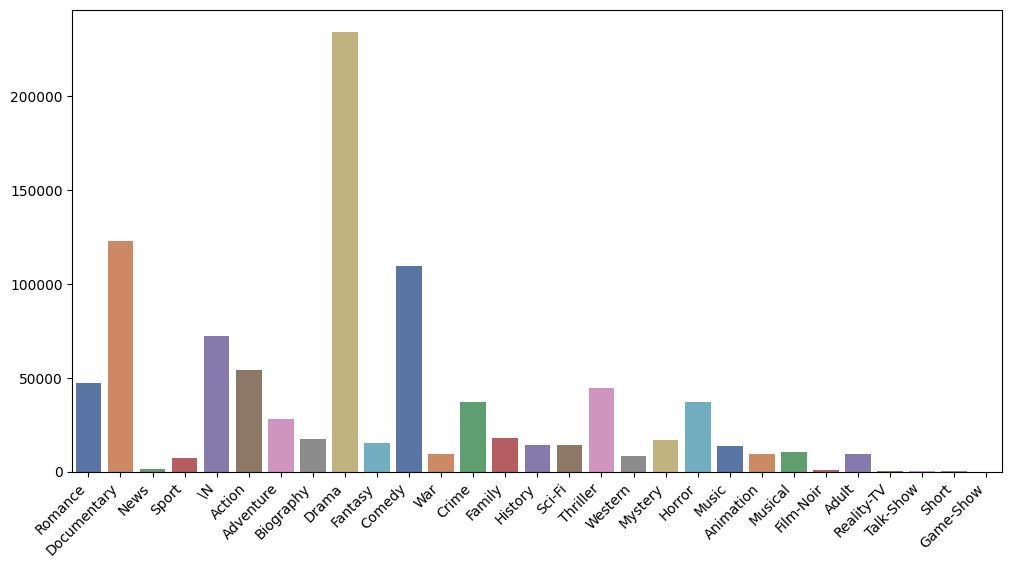

In [27]:
keys = list(genre_counts.keys())
# get values in the same order as keys, and parse percentage values
vals = [genre_counts[k] for k in keys]

plt.figure(figsize=(12, 6))
chart = sns.barplot(x=keys, y=vals, palette=sns.color_palette("deep", n_colors=len(keys)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

##### The resulting chart is a bar plot showing the counts of each genre. Each genre is represented by a bar, and the height of the bar corresponds to the count. The x-axis displays the genres, and the y-axis represents the count values. The chart provides a visual representation of the popularity  of each genre. By looking at this graph we can conclude that Drama is the most popular genre.

## Merge DataFrames


In [7]:
# Merge basics_df and ratings_df on the 'tconst' column
merged_df = pd.merge(movies_df, ratings_df, on='tconst')


## Filter Movies and Remove Missing Information

In [8]:
# Filter the merged DataFrame to include only movies (titleType == 'movie')
movies_df = merged_df[merged_df['titleType'] == 'movie']

# Remove rows with missing genre or rating information
movies_df = movies_df.dropna(subset=['genres', 'averageRating'])


## Calculate Genre Ratings

In [9]:
# Create a dictionary to store genre ratings
genre_ratings = {}

# Iterate over each row and calculate the average rating for each genre
for index, row in movies_df.iterrows():
    genres = row['genres'].split(',')
    rating = row['averageRating']
    
    for genre in genres:
        if genre in genre_ratings:
            genre_ratings[genre].append(rating)
        else:
            genre_ratings[genre] = [rating]


In [10]:
# Calculate the average rating for each genre
average_ratings = {genre: sum(ratings) / len(ratings) for genre, ratings in genre_ratings.items()}

# Find the genre with the highest average rating
highest_rated_genre = max(average_ratings, key=average_ratings.get)
average_rating = average_ratings[highest_rated_genre]

print(f"The highest rated genre is {highest_rated_genre} with an average rating of {average_rating}.")


The highest rated genre is Game-Show with an average rating of 8.9.


## Filter Movies and Remove Missing Data


In [11]:
# Filter the merged DataFrame to include only movies (titleType == 'movie')
movies_df = merged_df[merged_df['titleType'] == 'movie']

# Remove rows with missing startYear or averageRating information
movies_df = movies_df.dropna(subset=['startYear', 'averageRating'])


## Create a new 'decade' column by rounding down the 'startYear' to the nearest 10


In [12]:
# Convert the 'startYear' column to numeric
movies_df['startYear'] = pd.to_numeric(movies_df['startYear'], errors='coerce')

# Create a new 'decade' column by rounding down the 'startYear' to the nearest 10
movies_df['decade'] = (movies_df['startYear'] // 10) * 10


## Group the DataFrame by 'decade' and calculate the average rating


In [13]:
average_ratings_by_decade = movies_df.groupby('decade')['averageRating'].mean()
decade_rating_df = average_ratings_by_decade.to_frame()

## Sort the average ratings in descending order

## Print the average ratings by decade - sorted by decade.

In [14]:
#   sorted(average_ratings_by_decade.keys())
print(average_ratings_by_decade)

decade
1890.0    4.450000
1900.0    4.465060
1910.0    5.795373
1920.0    6.106548
1930.0    6.093511
1940.0    6.209465
1950.0    6.216173
1960.0    6.149112
1970.0    5.961352
1980.0    6.014528
1990.0    6.031436
2000.0    6.206385
2010.0    6.243354
2020.0    6.383182
Name: averageRating, dtype: float64


### Print the average ratings by decade - sorted by rating.

In [15]:
print(average_ratings_by_decade.sort_index(ascending=False))

decade
2020.0    6.383182
2010.0    6.243354
2000.0    6.206385
1990.0    6.031436
1980.0    6.014528
1970.0    5.961352
1960.0    6.149112
1950.0    6.216173
1940.0    6.209465
1930.0    6.093511
1920.0    6.106548
1910.0    5.795373
1900.0    4.465060
1890.0    4.450000
Name: averageRating, dtype: float64


### Graph the average ratings by decade - sorted by decade.

In [16]:
print(type(decade_rating_df))
print(decade_rating_df)

<class 'pandas.core.frame.DataFrame'>
        averageRating
decade               
1890.0       4.450000
1900.0       4.465060
1910.0       5.795373
1920.0       6.106548
1930.0       6.093511
1940.0       6.209465
1950.0       6.216173
1960.0       6.149112
1970.0       5.961352
1980.0       6.014528
1990.0       6.031436
2000.0       6.206385
2010.0       6.243354
2020.0       6.383182


 ### Question 2. How did movie ratings change through the decades?

<AxesSubplot: xlabel='decade', ylabel='averageRating'>

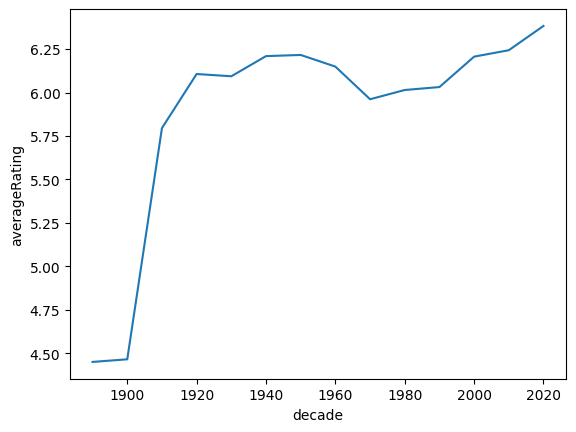

In [17]:
sns.lineplot(
    average_ratings_by_decade
)

##### The line graph shows the average ratings of movies over different decades. The x-axis represents the decades, while the y-axis represents the average rating. From the graph, we can observe the trend in movie ratings over time. The graph shows how the average rating has changed over time, indicating the overall perception of movie quality. Movies prior to 1920 are not well rated, movies after that time have varying rate.

### Visualization containing one quantitative and one categorical variable - Average Rating by genre - SETUP

In [18]:
print(average_ratings)
print(type(average_ratings))

{'Romance': 6.101201044386466, 'Documentary': 7.230423280423228, 'News': 7.21793313069908, 'Sport': 6.623001402524556, '\\N': 6.190131254317589, 'Action': 5.716132666247041, 'Adventure': 5.866273261239547, 'Biography': 6.961319920406795, 'Drama': 6.2512486988761875, 'Fantasy': 5.897194457064985, 'Comedy': 5.910983590612819, 'War': 6.409575340219739, 'Crime': 5.986335109532268, 'Family': 6.215616972273883, 'History': 6.810712524654867, 'Sci-Fi': 5.329512478235644, 'Thriller': 5.603034646572213, 'Western': 5.81935547647291, 'Mystery': 5.858538984263231, 'Horror': 5.003914117423522, 'Music': 6.682187730968262, 'Animation': 6.373674841772148, 'Musical': 6.180018805829807, 'Film-Noir': 6.466211604095564, 'Adult': 5.567387304507812, 'Reality-TV': 6.533962264150944, 'Talk-Show': 6.278571428571428, 'Short': 7.16875, 'Game-Show': 8.9}
<class 'dict'>


###   Question 3. Highest Average Rating by genre
Visualization containing one quantitative and one categorical variable

In [22]:
keys = list(average_ratings.keys())
# get values in the same order as keys, and parse percentage values
vals = [average_ratings[k] for k in keys]


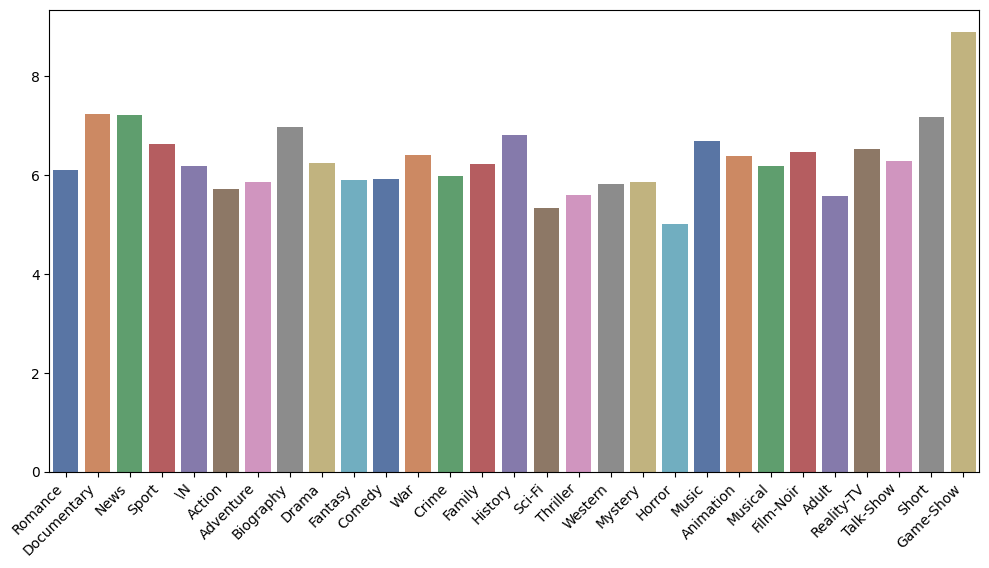

In [23]:
plt.figure(figsize=(12, 6))
chart = sns.barplot(x=keys, y=vals, palette=sns.color_palette("deep", n_colors=len(keys)))
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

##### The graph provides a clear overview of the highest rated genres, allowing you to identify those with a higher average ratings. It can help you make informed decisions or gain insights about the preferences of viewers based on how they rated each genre. Game-Show is the highest rated.

### How many series were there per year over time?

In [24]:
episode_df = pd.read_csv(file5, sep='\t')
print(episode_df.head(20))
print(movies_df.head(20))

       tconst parentTconst seasonNumber episodeNumber
0   tt0041951    tt0041038            1             9
1   tt0042816    tt0989125            1            17
2   tt0042889    tt0989125           \N            \N
3   tt0043426    tt0040051            3            42
4   tt0043631    tt0989125            2            16
5   tt0043693    tt0989125            2             8
6   tt0043710    tt0989125            3             3
7   tt0044093    tt0959862            1             6
8   tt0044668    tt0044243            2            16
9   tt0044901    tt0989125            3            46
10  tt0045519    tt0989125            4            11
11  tt0045960    tt0044284            2             3
12  tt0046135    tt0989125            4             5
13  tt0046150    tt0341798           \N            \N
14  tt0046855    tt0046643            1             4
15  tt0046864    tt0989125            5            20
16  tt0047810    tt0914702            3            36
17  tt0047852    tt0047745  

### By decade, who was the most popular actor/actress?

In [ ]:
#   First read in actors...
actors_df = pd.read_csv(file1, sep='\t')

In [ ]:
#  Then split the CSV into rows
#  df['Seatblocks'].str.split(' ').apply(Series, 1).stack()
# actor_movie_df = actors_df['knownForTitles'].str.split(',').apply(axis=1).stack()

# actor_movie_df = actors_df['knownForTitles'].apply(str.split(','), axis=1).stack()
print(actors_df.head(20))
print(pd.__version__)

In [ ]:
 # xref_df = actors_df['knownForTitles'].str.split(',')
# actors_df.explode(list(actors_df['knownForTitles'].str.split(',')))
# xref_df

small_df = actors_df.head(20)
xref = list(small_df['knownForTitles'].str.split(','))
print(type(xref))

In [ ]:
# print(xref_df)
# xref_df.explode(

In [25]:
actors_df.describe()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
count,12548289,12548286,12548289,12548289,10120306,12548289
unique,12548289,9731070,524,465,21379,5399606
top,nm0000001,Alex,\N,\N,actor,\N
freq,1,409,11969027,12332810,2293847,1255156


# Next Steps
1. When running pd.read_csv, use the file name variable instead of hard coded name.(Andrew) (Finished)
1. Rename variables for dataframes (_df for dataframes) (Andrew) (Finished)
1. For decades, print it out a second time by decade. (Joe)
1. for decades, lets print out a line graph by decade.(Joe)
1. before each block of code, add a markdown to explain what is happening.(Andrew) (Finished)
1. average rating by actor(Joe Optional)
1. Idenitfy the three different visualizations we need. (Andrew)
   - Visualization containing two quantitative variables (Joe) (Line Graph-rating by decade)
   - Visualization containing one quantitative and one categorical variable (Joe) (Bar Graph-Count by genre/Rating by genre)
   - Visualization containing distribution information of quantitative variable(s) (Joe) (By decade, who was the most popular (i.e. busiest) actor - by count of movies.)
1. We are only using two CSV files currently and we need to be using three
    - Find out how to make average rating by actor work
    - If we cannot, discuss new tables we want to compare.
1. Power BI dashboard (Optional) (Andrew)
